In [1]:
import pandas as pd
from scipy.signal import butter, lfilter, firwin, filtfilt
import matplotlib.pyplot as plt


Análise Estatística do Sinal Original (Temperatura)
count    500.000000
mean      24.500000
std        2.875158
min       20.000000
25%       22.000000
50%       24.500000
75%       27.000000
max       29.000000
dtype: float64

Análise Estatística do Sinal Filtrado (IIR - Temperatura)
count    500.000000
mean      24.500034
std        0.435661
min       19.939242
25%       24.491689
50%       24.500602
75%       24.508313
max       28.950593
dtype: float64

Análise Estatística do Sinal Filtrado (FIR - Temperatura)
count    500.000000
mean      24.500000
std        0.458124
min       20.000000
25%       24.499998
50%       24.500000
75%       24.500002
max       29.000000
dtype: float64


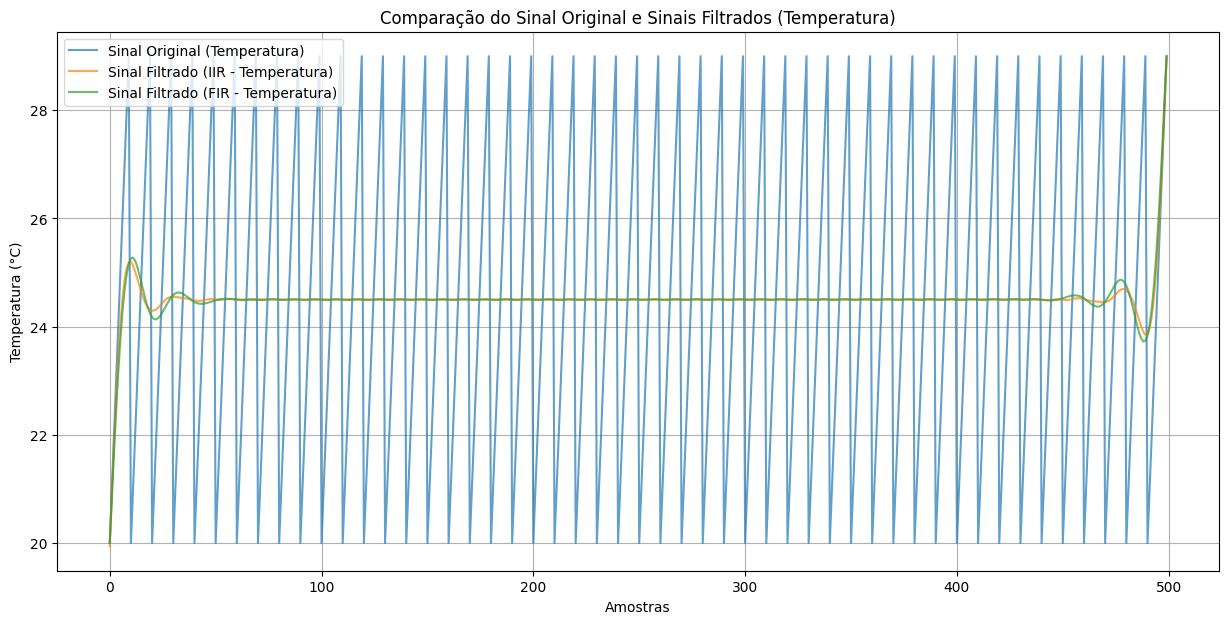

In [4]:
df = pd.read_csv("https://github.com/andersonpog/simulacao-instrumentacao/raw/refs/heads/main/sensor_maintenance_data.csv")

# Escolher a coluna de temperatura
sinal_temperatura = df["Temperature (°C)"].values

# Filtro IIR (Butterworth Low-pass)
# Parâmetros do filtro
ordem = 4
corte_freq = 0.1  # Frequência de corte normalizada (0 a 1, onde 1 é a frequência de Nyquist)

b, a = butter(ordem, corte_freq, btype="low", analog=False)
sinal_iir = filtfilt(b, a, sinal_temperatura)

# Filtro FIR (Low-pass)
# Parâmetros do filtro
numtaps = 101  # Número de taps (coeficientes) do filtro
corte_fir = 0.1

fir_corte = firwin(numtaps, corte_fir, pass_zero="lowpass")
sinal_fir = filtfilt(fir_corte, 1.0, sinal_temperatura)

# Análise dos Sinais
print("\nAnálise Estatística do Sinal Original (Temperatura)")
print(pd.Series(sinal_temperatura).describe())

print("\nAnálise Estatística do Sinal Filtrado (IIR - Temperatura)")
print(pd.Series(sinal_iir).describe())

print("\nAnálise Estatística do Sinal Filtrado (FIR - Temperatura)")
print(pd.Series(sinal_fir).describe())

# Visualização
plt.figure(figsize=(15, 7))
plt.plot(sinal_temperatura, label="Sinal Original (Temperatura)", alpha=0.7)
plt.plot(sinal_iir, label="Sinal Filtrado (IIR - Temperatura)", alpha=0.7)
plt.plot(sinal_fir, label="Sinal Filtrado (FIR - Temperatura)", alpha=0.7)
plt.title("Comparação do Sinal Original e Sinais Filtrados (Temperatura)")
plt.xlabel("Amostras")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.savefig("sinal_filtrado_comparacao.png")